<a href="https://colab.research.google.com/github/FatihUcars/DL/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Fatih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
#This is a grayscale image, not an RGB.
X_train[5].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [6]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

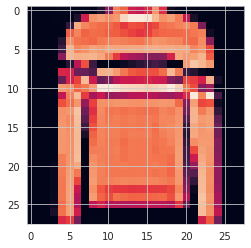

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

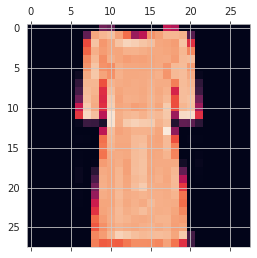

In [8]:
plt.matshow(X_train[47])

In [9]:
y_train[5]

2

In [10]:
y_train.shape

(60000,)

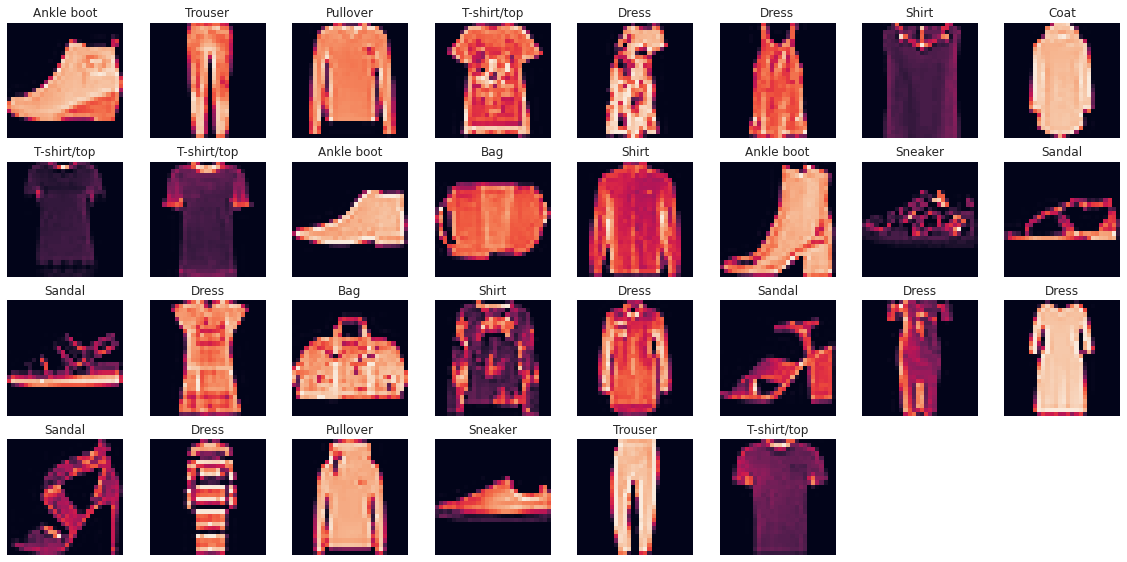

In [11]:
#I picked 30 random images from the dataset.
plt.figure(figsize=(20, 20))
for i in range(30):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
X_train[9].min()

0

In [13]:
X_train[9].max()

255

In [14]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [15]:
X_train[9].min()

0.0

In [16]:
X_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
#Since this is a grayscale image, I add 1 as fourth dimension as the channel nr.
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [20]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [21]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [23]:
y_train.shape

(60000,)

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
#One-hotencoding. I have 10 catagories.
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [26]:
y_train[5]

2

In [27]:
Y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [34]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.3807 - accuracy: 0.8681 - val_loss: 0.3066 - val_accuracy: 0.8919
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2529 - accuracy: 0.9106 - val_loss: 0.2829 - val_accuracy: 0.9010
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2172 - accuracy: 0.9233 - val_loss: 0.2729 - val_accuracy: 0.9076
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1936 - accuracy: 0.9318 - val_loss: 0.2804 - val_accuracy: 0.9052
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1748 - accuracy: 0.9383 - val_loss: 0.2903 - val_accuracy: 0.9087


**TASK 7: Plot values of metrics you used in your model.**

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.381,0.868,0.307,0.892
1,0.253,0.911,0.283,0.901
2,0.217,0.923,0.273,0.908
3,0.194,0.932,0.280,0.905
4,0.175,0.938,0.290,0.909


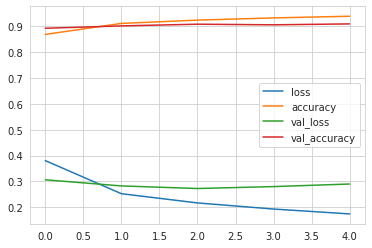

In [37]:
summary.plot();

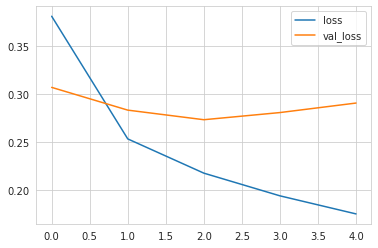

In [38]:
summary[["loss", "val_loss"]].plot();

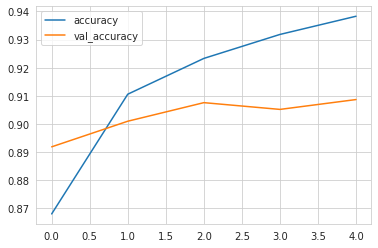

In [39]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2729 - accuracy: 0.9076


[0.27289649844169617, 0.9075999855995178]

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27289649844169617
Test accuracy: 0.9075999855995178


In [44]:
pred_prob = model.predict(X_test)

In [45]:
y_pred = np.argmax(pred_prob, axis=1)

In [46]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [47]:
print(classification_report(y_test, y_pred))
#My scores for category 6 (shirt) is low compared to others.

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.86      0.94      0.90      1000
           4       0.83      0.89      0.86      1000
           5       0.96      0.99      0.98      1000
           6       0.78      0.69      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.96      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [48]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Prediction

In [54]:
my_cloth = X_test[17]

In [55]:
my_cloth.shape

(28, 28, 1)

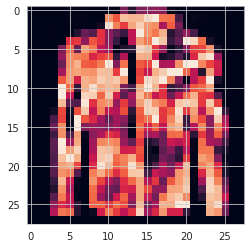

In [56]:
plt.imshow(my_cloth.reshape(28,28));

In [57]:
pred_prob = model.predict(my_cloth.reshape(1,28,28,1))
pred_prob

array([[2.7133638e-07, 9.1563273e-09, 1.9598324e-04, 4.6697841e-09,
        9.4457573e-01, 6.6813794e-09, 5.5227999e-02, 9.2913513e-13,
        4.1370103e-09, 1.6989844e-10]], dtype=float32)

In [59]:
#I would say it's a shirt. But there are coats that look like this one. So, I don't blame my model :)
y_pred = np.argmax(pred_prob)
y_pred


4

In [60]:
model.save("cnn-hw1.h5")

In [61]:
model=tf.keras.models.load_model('cnn-hw1.h5')

In [62]:
pred=model.predict(np.expand_dims(X_test[84],axis=0))

In [63]:
np.argmax(pred)

5

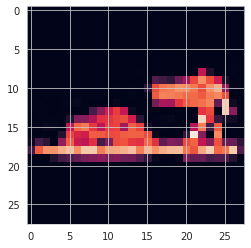

In [64]:
#See, now my model did a perfect job. This is a sandal.
plt.imshow(X_test[84].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___